# Introduction to Pandas
* You should have some knowledge with Python
* Pandas is an open source library for data analysis, data manipulation and data visualization
* Pandas installation (Anaconda / pip install pandas)
* What should you expect?
     - Exploratory Data Analysis (EDA)
     - Feeding data into machine learning tools like scikit-learn
     - Building machine learning models on your own data
     - Taking cleaned and processed data to any number of data tools

source >>> https://www.youtube.com/watch?v=x_c8DQQYyh0&list=PLoTScYm9O0GEZpIlV6-_ppgQmBO0luWG-&index=3

## Mounting google drive for file accessibility

In [1]:
from google.colab import drive
drive.mount('/drive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


## Import necessary libraries

In [2]:
import requests
import pandas as pd
pd.__version__

'1.0.5'

## Read data from several formats

### CSV format

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv'
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EXCEL format

In [5]:
path = '/drive/My Drive/Colab Notebooks/SCGP/dataset/movies.xls'
movies = pd.read_excel(path)

In [6]:
movies.sample(10)

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,Actor 1,Actor 2,Actor 3,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
33,The Lost Weekend,1945,Drama|Film-Noir,English,USA,Not Rated,101,1.37,1250000.0,NaN,Billy Wilder,Ray Milland,Jane Wyman,Frank Faylen,0,287,160,66.0,581,0,4,24959,136,97.0,8.0
216,Close Encounters of the Third Kind,1977,Drama|Sci-Fi,English,USA,PG,135,2.35,19400870.0,128300000.0,Steven Spielberg,Bob Balaban,Teri Garr,Melinda Dillon,14000,559,481,252.0,1591,0,0,139288,339,171.0,7.7
924,Alien: Resurrection,1997,Action|Horror|Sci-Fi,English,USA,R,116,2.35,75000000.0,47748610.0,Jean-Pierre Jeunet,Gary Dourdan,Michael Wincott,Raymond Cruz,0,1000,720,672.0,3090,0,0,170179,656,223.0,6.3
118,Batman: The Movie,1966,Adventure|Comedy|Family,English,USA,Approved,105,1.85,1377800.0,NaN,Leslie H. Martinson,Burgess Meredith,Cesar Romero,Burt Ward,7,1000,370,356.0,2658,0,1,22975,155,53.0,6.5
1298,The Boondock Saints,1999,Action|Crime|Thriller,English,Canada,R,102,2.35,7000000.0,NaN,Troy Duffy,Norman Reedus,David Della Rocco,Bob Marley,78,12000,333,184.0,12680,16000,2,197845,876,100.0,7.9
601,Star Trek VI: The Undiscovered Country,1991,Action|Adventure|Sci-Fi|Thriller,English,USA,PG,110,2.35,30000000.0,74888996.0,Nicholas Meyer,Leonard Nimoy,Kurtwood Smith,Nichelle Nichols,120,12000,1000,664.0,16230,0,0,55513,188,112.0,7.2
88,The Man Who Shot Liberty Valance,1962,Drama|Western,English,USA,Approved,113,1.85,3200000.0,NaN,John Ford,Lee Marvin,Woody Strode,Vera Miles,673,756,423,332.0,2693,0,1,53741,214,107.0,8.1
416,My Beautiful Laundrette,1985,Comedy|Drama|Romance,English,UK,R,97,1.66,650000.0,NaN,Stephen Frears,Saeed Jaffrey,Roshan Seth,Garry Cooper,350,114,61,33.0,260,0,1,10577,64,46.0,6.9
347,Tootsie,1982,Comedy|Drama|Romance,English,USA,PG,116,2.35,22000000.0,177200000.0,Sydney Pollack,Bill Murray,Sydney Pollack,Teri Garr,521,13000,521,481.0,14701,0,1,77366,194,94.0,7.4
202,The Return of the Pink Panther,1975,Comedy|Crime|Mystery,English,UK,G,113,2.35,5000000.0,NaN,Blake Edwards,Burt Kwouk,Herbert Lom,Catherine Schell,688,462,278,80.0,971,620,0,19596,73,33.0,7.1


### JSON format

In [7]:
url = 'https://corona.lmao.ninja/v2/jhucsse'
r = requests.get(url)
data = r.json()
data

[{'coordinates': {'latitude': '42.35122196', 'longitude': '13.39843823'},
  'country': 'Italy',
  'county': None,
  'province': 'Abruzzo',
  'stats': {'confirmed': 3373, 'deaths': 472, 'recovered': 2792},
  'updatedAt': '2020-07-30 04:35:05'},
 {'coordinates': {'latitude': '-9.0238', 'longitude': '-70.812'},
  'country': 'Brazil',
  'county': None,
  'province': 'Acre',
  'stats': {'confirmed': 19366, 'deaths': 510, 'recovered': 13724},
  'updatedAt': '2020-07-30 04:35:05'},
 {'coordinates': {'latitude': '44.6939006', 'longitude': '40.1520421'},
  'country': 'Russia',
  'county': None,
  'province': 'Adygea Republic',
  'stats': {'confirmed': 2679, 'deaths': 20, 'recovered': 2070},
  'updatedAt': '2020-07-30 04:35:05'},
 {'coordinates': {'latitude': '21.8853', 'longitude': '-102.2916'},
  'country': 'Mexico',
  'county': None,
  'province': 'Aguascalientes',
  'stats': {'confirmed': 3927, 'deaths': 247, 'recovered': 3260},
  'updatedAt': '2020-07-30 04:35:05'},
 {'coordinates': {'latit

In [8]:
covid = pd.DataFrame(data)
covid.sample(3)

,country,county,updatedAt,stats,coordinates,province
57,Sweden,None,2020-07-30 04:35:05,"{'confirmed': 487, 'deaths': 14, 'recovered': 0}","{'latitude': '56.2784', 'longitude': '15.01799...",Blekinge
214,Russia,None,2020-07-30 04:35:05,"{'confirmed': 3408, 'deaths': 18, 'recovered':...","{'latitude': '54.53357809999999', 'longitude':...",Kemerovo Oblast
552,Comoros,None,2020-07-30 04:35:05,"{'confirmed': 378, 'deaths': 7, 'recovered': 330}","{'latitude': '-11.6455', 'longitude': '43.3333'}",None


In [9]:
covid.loc[covid['country']=='China']

,country,county,updatedAt,stats,coordinates,province
20,China,None,2020-07-30 04:35:05,"{'confirmed': 991, 'deaths': 6, 'recovered': 985}","{'latitude': '31.8257', 'longitude': '117.2264'}",Anhui
51,China,None,2020-07-30 04:35:05,"{'confirmed': 933, 'deaths': 9, 'recovered': 901}","{'latitude': '40.1824', 'longitude': '116.4142'}",Beijing
99,China,None,2020-07-30 04:35:05,"{'confirmed': 583, 'deaths': 6, 'recovered': 577}","{'latitude': '30.0572', 'longitude': '107.874'}",Chongqing
134,China,None,2020-07-30 04:35:05,"{'confirmed': 366, 'deaths': 1, 'recovered': 362}","{'latitude': '26.0789', 'longitude': '117.9874'}",Fujian
139,China,None,2020-07-30 04:35:05,"{'confirmed': 167, 'deaths': 2, 'recovered': 165}","{'latitude': '35.7518', 'longitude': '104.2861'}",Gansu
155,China,None,2020-07-30 04:35:05,"{'confirmed': 1675, 'deaths': 8, 'recovered': ...","{'latitude': '23.3417', 'longitude': '113.4244'}",Guangdong
156,China,None,2020-07-30 04:35:05,"{'confirmed': 255, 'deaths': 2, 'recovered': 253}","{'latitude': '23.8298', 'longitude': '108.7881'}",Guangxi
159,China,None,2020-07-30 04:35:05,"{'confirmed': 147, 'deaths': 2, 'recovered': 145}","{'latitude': '26.8154', 'longitude': '106.8748'}",Guizhou
162,China,None,2020-07-30 04:35:05,"{'confirmed': 171, 'deaths': 6, 'recovered': 165}","{'latitude': '19.1959', 'longitude': '109.7453'}",Hainan
166,China,None,2020-07-30 04:35:05,"{'confirmed': 349, 'deaths': 6, 'recovered': 343}","{'latitude': '37.8957', 'longitude': '114.9042'}",Hebei


In [10]:
covid_stats = pd.json_normalize(covid['stats'])
covid_coordinates = pd.json_normalize(covid['coordinates'])

In [11]:
covid_final = pd.concat([covid, covid_stats, covid_coordinates], axis='columns')
covid_final.head()

,country,county,updatedAt,stats,coordinates,province,confirmed,deaths,recovered,latitude,longitude
0,Italy,None,2020-07-30 04:35:05,"{'confirmed': 3373, 'deaths': 472, 'recovered'...","{'latitude': '42.35122196', 'longitude': '13.3...",Abruzzo,3373,472,2792,42.35122196,13.39843823
1,Brazil,None,2020-07-30 04:35:05,"{'confirmed': 19366, 'deaths': 510, 'recovered...","{'latitude': '-9.0238', 'longitude': '-70.812'}",Acre,19366,510,13724,-9.0238,-70.812
2,Russia,None,2020-07-30 04:35:05,"{'confirmed': 2679, 'deaths': 20, 'recovered':...","{'latitude': '44.6939006', 'longitude': '40.15...",Adygea Republic,2679,20,2070,44.6939006,40.1520421
3,Mexico,None,2020-07-30 04:35:05,"{'confirmed': 3927, 'deaths': 247, 'recovered'...","{'latitude': '21.8853', 'longitude': '-102.2916'}",Aguascalientes,3927,247,3260,21.8853,-102.2916
4,Japan,None,2020-07-30 04:35:05,"{'confirmed': 1447, 'deaths': 35, 'recovered':...","{'latitude': '35.035551', 'longitude': '137.21...",Aichi,1447,35,523,35.035551,137.211621


In [12]:
covid_final.drop(columns=['stats', 'coordinates'], inplace=True)
covid_final.head()

,country,county,updatedAt,province,confirmed,deaths,recovered,latitude,longitude
0,Italy,None,2020-07-30 04:35:05,Abruzzo,3373,472,2792,42.35122196,13.39843823
1,Brazil,None,2020-07-30 04:35:05,Acre,19366,510,13724,-9.0238,-70.812
2,Russia,None,2020-07-30 04:35:05,Adygea Republic,2679,20,2070,44.6939006,40.1520421
3,Mexico,None,2020-07-30 04:35:05,Aguascalientes,3927,247,3260,21.8853,-102.2916
4,Japan,None,2020-07-30 04:35:05,Aichi,1447,35,523,35.035551,137.211621


In [13]:
covid_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    743 non-null    object
 1   county     52 non-null     object
 2   updatedAt  743 non-null    object
 3   province   575 non-null    object
 4   confirmed  743 non-null    int64 
 5   deaths     743 non-null    int64 
 6   recovered  743 non-null    int64 
 7   latitude   743 non-null    object
 8   longitude  743 non-null    object
dtypes: int64(3), object(6)
memory usage: 52.4+ KB


In [14]:
covid_final['updatedAt'] = covid_final['updatedAt'].astype('datetime64')
covid_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    743 non-null    object        
 1   county     52 non-null     object        
 2   updatedAt  743 non-null    datetime64[ns]
 3   province   575 non-null    object        
 4   confirmed  743 non-null    int64         
 5   deaths     743 non-null    int64         
 6   recovered  743 non-null    int64         
 7   latitude   743 non-null    object        
 8   longitude  743 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 52.4+ KB


In [15]:
covid_final[['latitude', 'longitude']] = covid_final[['latitude', 'longitude']].apply(pd.to_numeric, errors='coerce')
covid_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    743 non-null    object        
 1   county     52 non-null     object        
 2   updatedAt  743 non-null    datetime64[ns]
 3   province   575 non-null    object        
 4   confirmed  743 non-null    int64         
 5   deaths     743 non-null    int64         
 6   recovered  743 non-null    int64         
 7   latitude   726 non-null    float64       
 8   longitude  726 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 52.4+ KB


## Write to file

In [16]:
covid_final.to_csv('/drive/My Drive/Colab Notebooks/SCGP/dataset/covid19.csv', index=False)

In [17]:
covid_final.to_excel('/drive/My Drive/Colab Notebooks/SCGP/dataset/covid19.xlsx', index=False)

## Some basic explorations

In [18]:
df = covid_final.copy()

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
confirmed,743.0,22919.454913,57765.416331,0.000000,772.000000,3694.000000,14954.500000,5.141970e+05
deaths,743.0,897.726783,2964.921160,0.000000,11.000000,77.000000,518.500000,4.136000e+04
recovered,743.0,13389.183042,60866.446696,0.000000,63.000000,1254.000000,6137.500000,1.389425e+06
latitude,726.0,27.574122,25.262370,-52.368000,12.193375,34.209241,46.980998,7.170690e+01
longitude,726.0,10.661880,76.067312,-161.972202,-69.213350,14.604630,67.513390,1.780650e+02


In [20]:
df.corr()

,confirmed,deaths,recovered,latitude,longitude
confirmed,1.000000,0.717565,0.367549,-0.104739,-0.157318
deaths,0.717565,1.000000,0.232518,-0.014368,-0.149939
recovered,0.367549,0.232518,1.000000,-0.171045,-0.008386
latitude,-0.104739,-0.014368,-0.171045,1.000000,0.235131
longitude,-0.157318,-0.149939,-0.008386,0.235131,1.000000


In [21]:
df.nlargest(5, columns='confirmed')

,country,county,updatedAt,province,confirmed,deaths,recovered,latitude,longitude
402,Brazil,None,2020-07-30 04:35:05,Sao Paulo,514197,22389,344501,-23.550500,-46.633300
714,US,Alameda,2020-07-30 04:35:05,California,484913,8908,0,37.646294,-121.892927
661,South Africa,None,2020-07-30 04:35:05,None,471123,7497,297967,-30.559500,22.937500
712,US,Alachua,2020-07-30 04:35:05,Florida,451423,6333,0,29.678665,-82.359282
722,US,Anderson,2020-07-30 04:35:05,Texas,418995,6193,0,31.815347,-95.653548


In [22]:
df.nsmallest(5, columns='confirmed')

,country,county,updatedAt,province,confirmed,deaths,recovered,latitude,longitude
115,Canada,None,2020-07-30 04:35:05,Diamond Princess,0,1,0,NaN,NaN
241,India,None,2020-07-30 04:35:05,Lakshadweep,0,0,0,13.699997,72.183333
374,US,None,2020-07-30 04:35:05,Recovered,0,0,1389425,NaN,NaN
469,India,None,2020-07-30 04:35:05,Unknown,0,0,0,NaN,NaN
472,Peru,None,2020-07-30 04:35:05,Unknown,0,0,280044,NaN,NaN


In [23]:
df.country.value_counts()

Russia            83
US                58
Japan             49
India             37
Colombia          34
                  ..
Namibia            1
Western Sahara     1
Argentina          1
Jamaica            1
Saint Lucia        1
Name: country, Length: 188, dtype: int64

In [24]:
df.sort_values(by='country', ascending=True, inplace=True)
df.head()

,country,county,updatedAt,province,confirmed,deaths,recovered,latitude,longitude
520,Afghanistan,None,2020-07-30 04:35:05,None,36471,1271,25389,33.93911,67.709953
521,Albania,None,2020-07-30 04:35:05,None,5105,150,2830,41.15330,20.168300
522,Algeria,None,2020-07-30 04:35:05,None,29229,1186,19592,28.03390,1.659600
523,Andorra,None,2020-07-30 04:35:05,None,918,52,804,42.50630,1.521800
524,Angola,None,2020-07-30 04:35:05,None,1078,48,301,-11.20270,17.873900


In [25]:
df.reset_index(drop=True, inplace=True)
df.head()

,country,county,updatedAt,province,confirmed,deaths,recovered,latitude,longitude
0,Afghanistan,None,2020-07-30 04:35:05,None,36471,1271,25389,33.93911,67.709953
1,Albania,None,2020-07-30 04:35:05,None,5105,150,2830,41.15330,20.168300
2,Algeria,None,2020-07-30 04:35:05,None,29229,1186,19592,28.03390,1.659600
3,Andorra,None,2020-07-30 04:35:05,None,918,52,804,42.50630,1.521800
4,Angola,None,2020-07-30 04:35:05,None,1078,48,301,-11.20270,17.873900


In [26]:
df[['confirmed', 'deaths', 'recovered']].sum()

confirmed    17029155
deaths         667011
recovered     9948163
dtype: int64

In [27]:
df[df['country'].str.contains('Thailand|Singapore|Malaysia')]

,country,county,updatedAt,province,confirmed,deaths,recovered,latitude,longitude
366,Malaysia,None,2020-07-30 04:35:05,None,8956,124,8612,4.210484,101.975766
571,Singapore,None,2020-07-30 04:35:05,None,51531,27,46098,1.283300,103.833300
626,Thailand,None,2020-07-30 04:35:05,None,3298,58,3111,15.870032,100.992541


In [28]:
df.loc[df.country=='China', ['confirmed', 'deaths', 'recovered']][:5]

,confirmed,deaths,recovered
98,991,6,985
99,496,3,79
100,167,2,165
101,255,2,253
102,147,2,145


In [29]:
df[['country', 'confirmed', 'deaths', 'recovered']].groupby('country').sum()

,confirmed,deaths,recovered
country,,,
Afghanistan,36471,1271,25389
Albania,5105,150,2830
Algeria,29229,1186,19592
Andorra,918,52,804
Angola,1078,48,301
...,...,...,...
West Bank and Gaza,11284,80,4833
Western Sahara,10,1,8
Yemen,1711,485,849


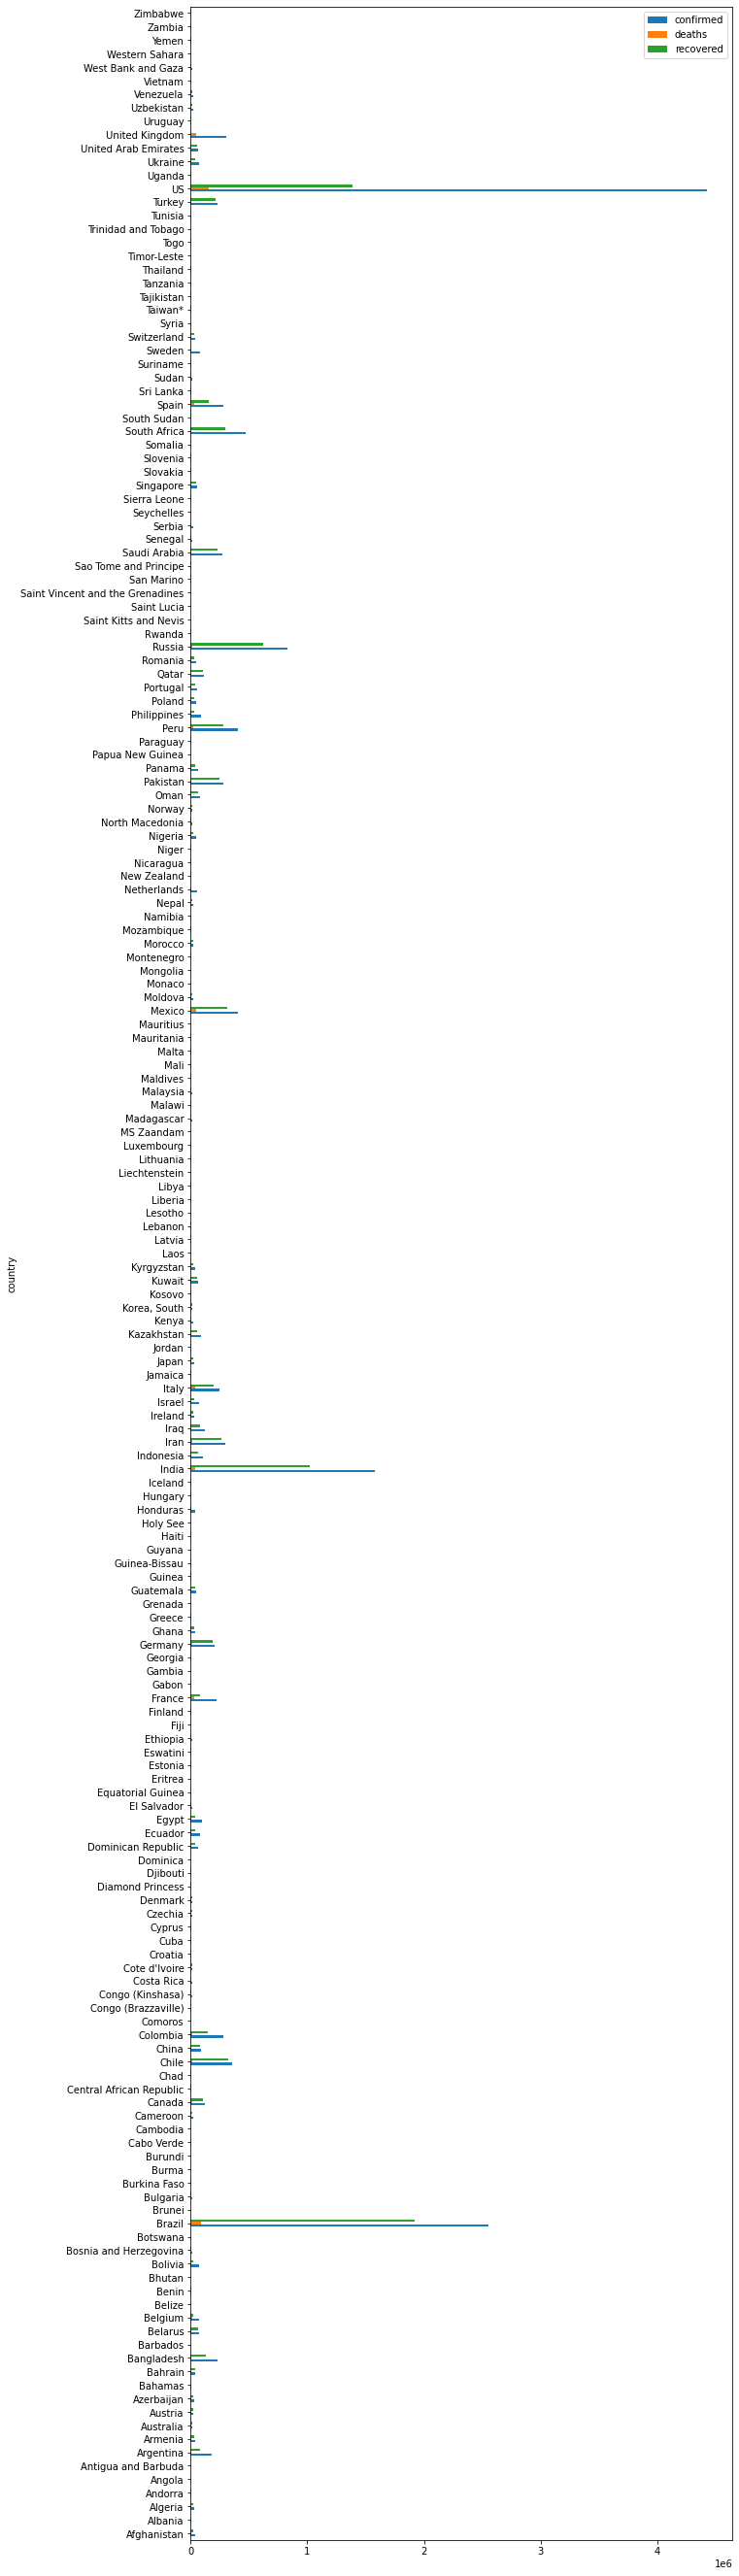

In [30]:
df[['country', 'confirmed', 'deaths', 'recovered']].groupby('country').sum().plot(kind='barh', figsize=(10,48));

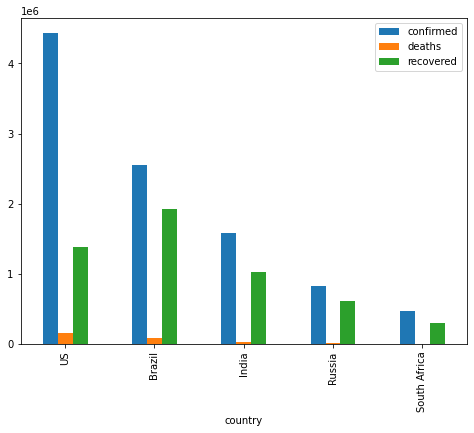

In [31]:
df[['country', 'confirmed', 'deaths', 'recovered']].groupby(['country']).sum().sort_values(by='confirmed', ascending=False)[:5].plot(kind='bar', figsize=(8,6));